In [1]:
!pip install -U git+https://github.com/Adapter-Hub/adapter-transformers.git
!pip install datasets

  Cloning https://github.com/Adapter-Hub/adapter-transformers.git to /tmp/pip-req-build-jrubkxdq
  Running command git clone -q https://github.com/Adapter-Hub/adapter-transformers.git /tmp/pip-req-build-jrubkxdq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for adapter-transformers: filename=adapter_transformers-2.0.1-cp37-none-any.whl size=2099116 sha256=d0d83d5916031bf64a1805b23780bef58775c8407469ec8d3ad1ccd8b58fd45c
  Stored in directory: /tmp/pip-ephem-wheel-cache-7yxkpemj/wheels/b0/56/c9/5bf1c51cd513412090ad751ab10fc025210176bf0a82dd8af3
Successfully built adapter-transformers
  Found existing installation: adapter-transformers 2.0.1
    Uninstalling adapter-transformers-2.0.1:
      Successfully uninstalled adapter-transformers-2.0.1


In [2]:
cd drive/MyDrive/CAMemBERT-Adapters/

/content/drive/MyDrive/CAMemBERT-Adapters


Using custom data configuration default-5d38379baf5a6fe6
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-5d38379baf5a6fe6/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0)
Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-5d38379baf5a6fe6/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0/cache-8c3cdebcca022747.arrow


Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-5d38379baf5a6fe6/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0/cache-b9a97993453948f7.arrow


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch,Training Loss,Validation Loss,Loss,F1,Accuracy
1,No log,0.451740,0.294524,0.815748,0.755230
2,0.408300,0.496286,0.140302,0.835913,0.778243
3,0.408300,0.793525,0.065231,0.855030,0.794979
4,0.181000,1.084294,0.054282,0.833073,0.776151
5,0.058200,1.174112,0.024699,0.853253,0.797071


{'train_loss': 0.2945241630077362, 'train_f1': 0.896266829865361, 'train_accuracy': 0.8659018987341772, 'eval_loss': 0.45173999667167664, 'eval_f1': 0.8157480314960631, 'eval_accuracy': 0.7552301255230126}
{'train_loss': 0.1403019279241562, 'train_f1': 0.9628654970760233, 'train_accuracy': 0.9497626582278481, 'eval_loss': 0.4962863624095917, 'eval_f1': 0.8359133126934984, 'eval_accuracy': 0.7782426778242678}
{'train_loss': 0.06523101776838303, 'train_f1': 0.9856692462023502, 'train_accuracy': 0.9802215189873418, 'eval_loss': 0.7935254573822021, 'eval_f1': 0.8550295857988166, 'eval_accuracy': 0.7949790794979079}
{'train_loss': 0.05428186431527138, 'train_f1': 0.9888123924268503, 'train_accuracy': 0.9845727848101266, 'eval_loss': 1.0842941999435425, 'eval_f1': 0.8330733229329174, 'eval_accuracy': 0.7761506276150628}
{'train_loss': 0.024699337780475616, 'train_f1': 0.9948674080410608, 'train_accuracy': 0.992879746835443, 'eval_loss': 1.1741116046905518, 'eval_f1': 0.8532526475037822, 'eva

{'eval_loss': 0.7813835740089417, 'eval_f1': 0.8299595141700404, 'eval_accuracy': 0.7862595419847328}
_________plotting history__________
defaultdict(<class 'list'>, {('_loss', 'train'): [0.2945241630077362, 0.1403019279241562, 0.06523101776838303, 0.05428186431527138, 0.024699337780475616], ('_f1', 'train'): [0.896266829865361, 0.9628654970760233, 0.9856692462023502, 0.9888123924268503, 0.9948674080410608], ('_accuracy', 'train'): [0.8659018987341772, 0.9497626582278481, 0.9802215189873418, 0.9845727848101266, 0.992879746835443], ('_loss', 'eval'): [0.45173999667167664, 0.4962863624095917, 0.7935254573822021, 1.0842941999435425, 1.1741116046905518], ('_f1', 'eval'): [0.8157480314960631, 0.8359133126934984, 0.8550295857988166, 0.8330733229329174, 0.8532526475037822], ('_accuracy', 'eval'): [0.7552301255230126, 0.7782426778242678, 0.7949790794979079, 0.7761506276150628, 0.797071129707113], ('_runtime', 'train'): [538.7966], ('_samples_per_second', 'train'): [2.932]})


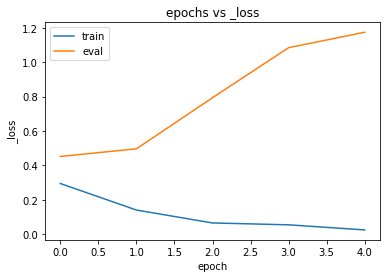

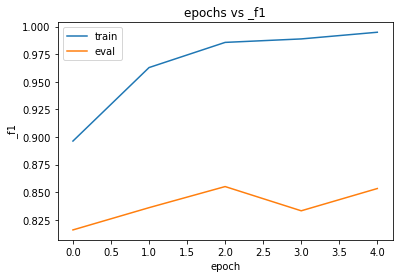

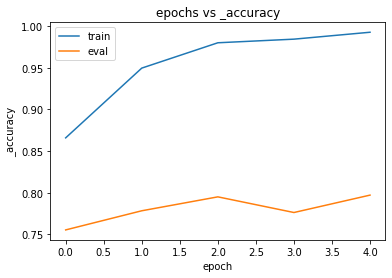

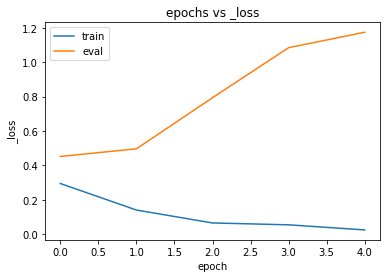

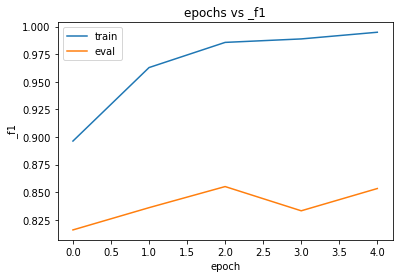

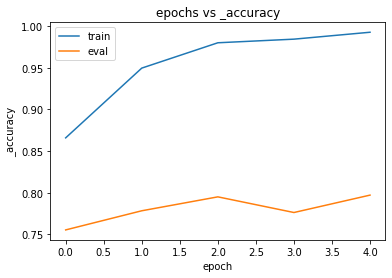

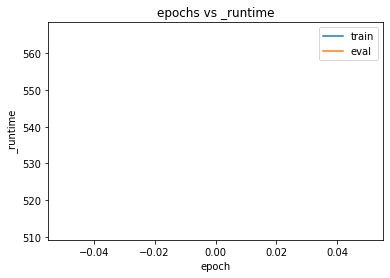

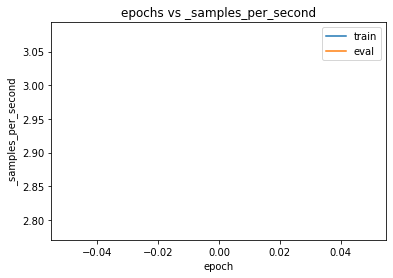

In [3]:
# import os, sys
# currentdir = os.path.dirname(os.path.realpath(__file__))
# preprocess_mod_ind = currentdir.split('/').index('CAMemBERT-Adapters')
# preprocess_mod_path = '/'.join(currentdir.split('/')[:preprocess_mod_ind+1])
# sys.path.append(preprocess_mod_path)
from transformers import AutoTokenizer,EarlyStoppingCallback,TrainingArguments,BertForSequenceClassification,AutoConfig
from datasets import load_dataset,load_metric
from src.utils.preprocessing import read_pickle_file
from src.models.trainers import BaseTrainer
from src.models.running import *
from sklearn.metrics import f1_score,accuracy_score
import torch
import numpy as np

def encode_batch(batch):
  """Encodes a batch of input data using the model tokenizer."""
  return tokenizer(batch[tokenize_col], max_length=max_n_tokens, truncation=True, padding="max_length")

def compute_metrics(p):
    logits, labels = np.argmax(p.predictions, axis=1),p.label_ids
    logits = logits.flatten()
    labels = labels.flatten()
    metrics_dic = {}
    metrics_dic['f1'] = f1_score(logits, labels)
    metrics_dic['accuracy'] = accuracy_score(logits,labels)
    return metrics_dic

es = 2
lr = 4e-5
bs = 16
epochs = 5
frozen_layers = 1
metric_for_best_model = 'f1'
dev = True

tokenize_col='tokens'
max_n_tokens=64
extra_cols_for_dataset=[]

params = generate_parameters(es,lr,bs,epochs,frozen_layers,metric_for_best_model,dev,max_n_tokens)

pre_trained_model_name = 'bert-base-uncased'
dataset_title = 'fce_grammar'
task = 'ged'
subtask = 'seq_class'
abrev_name = f'seq_class_bert_{dataset_title}'

file_paths = generate_file_paths(dataset_title,task,subtask,params,abrev_name)

dataset_dic = {'train':file_paths['train_file_path'],'test':file_paths['test_file_path'],'val':file_paths['val_file_path']}

dataset = load_dataset('csv', data_files=dataset_dic)
tokenizer = AutoTokenizer.from_pretrained(pre_trained_model_name)
dataset = dataset.map(encode_batch, batched=True)
dataset.set_format(type="torch", columns=["input_ids", "attention_mask","labels"]+extra_cols_for_dataset)

n_labels = 2
model_config = AutoConfig.from_pretrained(pre_trained_model_name, num_labels=n_labels)
model = BertForSequenceClassification.from_pretrained(pre_trained_model_name, config=model_config)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

training_args = base_training_args(params,file_paths)

callbacks = [EarlyStoppingCallback(es)]

trainer = BaseTrainer(model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["val"],
    compute_metrics=compute_metrics,
    callbacks=callbacks,)

trainer.train()

print()
print('__________test set results__________')
trainer.evaluate(dataset['test'],testing=True)
hist = trainer.state.log_history[-1]
eval_data = generate_eval_data(hist,params,task,subtask,pre_trained_model_name)
update_evaluation_results_for_this_model(f'{file_paths["evaluation_file_this_model"]}',eval_data)
update_evaluation_results_for_subtask(file_paths)

print('_________plotting history__________')
trainer.plot_history(file_paths['plots_path'],f'{file_paths["full_model_name"]}')